<font size=4 color='blue'>

# <center>Clase 9, julio 14 del 2021</center>


<font size=5 color="blue">

Overfitting

<img src="./images/1024px-Regularization.svg.png" width=300 height=300 align = "left" > 
 <img src="./images/Loss-function-no-dropout.png" width=420 height=420 align = "center" >    

<img src="./images/Loss-function-dropout.png" width=420 height=420 align = "center" >

<font size=5 color="blue">

Regularization as a method to reduce overfitting

<font size=4 color="black">

When an artificial intelligence method (for example neural networks) has many irrelevant features, the method presents overfitting, which is corrected by regularization, so that only a few features that are highly predictive of the outcome have large non-zero weights.

<font size=5 color="blue">

L1 regularization

<font size=4 color="black">
    
[L1 regularization](./literature/Statistical_Debugging_of_Sampled_Programs.pdf)
    
<font size=5 color='black'>    
$$   J = Error(y, F(x)) $$

<font size=4 color='black'>    
L1 regularization uses a penalty term which encourages the sum of the absolute values of the parameters (weights) to be small:
        
<font size=5 color='black'>
$$   J = Error(y, F(x)) + \lambda \sum_{i = 1 }^{N} | \omega_i | $$
  
<font size=4 color='black'>

In many learning systems, it has frequently been observed that L1 regularization causes many parameters to equal zero, so that the parameter vector is sparse. $\lambda$ is the regularization parameter.
    
$$ $$
[More about L1 regularization](./literature/lasso.pdf)    

<font size=5 color="blue">

L2 regularization

<font size=4 color="black">

[L2 regularization](./literature/L2_1999.pdf)
    
<font size=5 color='black'>    
$$   J = Error(y, F(x)) $$

<font size=4 color='black'> 
L2 regularization, encourages the sum of the squares of the parameters (weights) to be small:
$$ $$
    
<font size=5 color='black'>     
$$   J = Error(y, F(x)) + \lambda \sum_{i = 1 }^{N}  \omega_i{^2}  $$  

<font size=4 color="black">

[L1 versus L2 regularization](./literature/Regularization_Ng_2004.pdf)

<font size=5 color="blue">
Dropout   

<font size=4 color="black">
    
[Dropout](./literature/dropout_2014.pdf)
    


<font size=4 color="black">
    
This method prevents overfitting and provides a way of approximately combining exponentially many different neural network architectures efficiently. The term “dropout” refers to dropping out units (hidden and visible) in a neural network.
    
<img src="./images/dropout_image.jpeg" width=600 height=600 align = "midle" >     
    


<font size=5 color="blue">
More regularization methods
    
<font size=4 color="black">
    
[Example: early stopping](./literature/early_stopping_1998.pdf)    

<font size=5 color='blue'>
Object Recognition through images

<font size=5 color='blue'>
CIFAR-10 database

<font size=4 color="black">

[80 million tiny images from internet](./literature/80millionImages.pdf)

The CIFAR-10 and CIFAR-100 are labeled subsets of a 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. 


 <font size=4 color='black'>   

The data base can be downloaded from the following URL: 
    
[CIFAR-10 data download](https://www.cs.toronto.edu/~kriz/cifar.html)

$$ $$
 The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50.000 training images and 10,000 test images.

The ten classes are:

 
| index | class name |
| --- | --- |
| 0 | airplane |
| 1 | automobile | 										
| 2 | bird |										
| 3 | cat |										
| 4 | deer |										
| 5 | dog |										
| 6 | frog |										
| 7 | horse |										
| 8 | ship |										
| 9 | truck|

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pickle


np.random.seed(1)

%matplotlib inline

<font size = 5 color="blue">

CIFAR-10 data is also available from Keras: 
    


<font size = 4 color="black">

[CIFAR-10 Keras](https://keras.io/api/datasets/cifar10/)

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print('The type of x_train is', type(x_train))
print('The type of y_train is', type(y_train))

print('\nThe type of x_test is', type(x_test))
print('The type of y_test is', type(y_test))

The type of x_train is <class 'numpy.ndarray'>
The type of y_train is <class 'numpy.ndarray'>

The type of x_test is <class 'numpy.ndarray'>
The type of y_test is <class 'numpy.ndarray'>


In [5]:
print('The shape of x_train is', x_train.shape)
print('The shape of y_train is', y_train.shape)

print('\nThe shape of x_test is', x_test.shape)
print('The shape of y_test is', y_test.shape)

The shape of x_train is (50000, 32, 32, 3)
The shape of y_train is (50000, 1)

The shape of x_test is (10000, 32, 32, 3)
The shape of y_test is (10000, 1)


<font size=5 color="blue">

Analyzing the data extracted from CIFAR-10

<font size=5 color="blue">
    
View a sample from the data sets

<font size=4 color="black">
    
The input for a sample of the data sets is an array, where each value is the value of a single pixel. 

In [6]:
sample = 0
print("The features of a training sample \n \n", x_train[sample])

The features of a training sample 
 
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


<font size=4 color="black">
    
Each value of X in the example is between 0 and 255, they are not normalized.

In [7]:
# We define a dictionary to associate the class number to a class name.

dic = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 
       5: 'dog', 6: 'frog', 7:'horse', 8: 'ship', 9: 'truck'}

<font size=5 color="blue">
    
Showing the image and label(y) of any sample


The y value of the first training sample is 6
It correspons to a frog


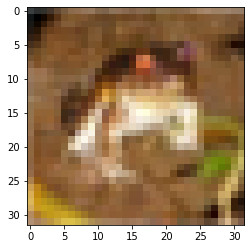

In [8]:
plt.imshow(x_train[sample]);

print("\nThe y value of the first training sample is",np.squeeze(y_train[sample]))
print("It correspons to a", dic[int(np.squeeze(y_train[sample]))])

<font size=5 color="blue">

Features (X values) normalization


<font size=4 color="black">
To normalize x values, we divide them by 255

In [9]:
train_x = x_train/255
test_x = x_test/255

<font size=4 color="black">    

Now the pixel values are between 0 and 1.

In [10]:
train_x[sample]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

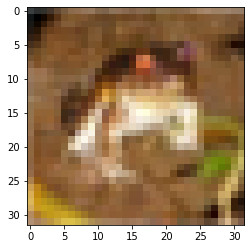

In [11]:
plt.imshow(train_x[sample])

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

<font size=5 color='blue'>
One-hot encoding of target variable (y)

<font size=4 color='black'>
The target value can have one of ten elements (classes), the digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9). 

The sets train_y and test_y are arrays in which each entry contains a digit represented as a integer of 64 bits.
    
We change this representation to a vector following the One-hot encoding 
[One-hot encoding](https://en.wikipedia.org/wiki/One-hot).
    
In One-Hot encoding, a digit is represented with a vector that has dimension 10 (because we have 10 classes) with 1.0 in the vector index corresponding to the digit and 0.0 elsewhere in the vector. 


In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train.reshape(-1).shape

(50000,)

In [15]:
train_y = np.eye(10)[y_train.reshape(-1)]
test_y = np.eye(10)[y_test.reshape(-1)]

In [16]:
print(y_train[0:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [17]:
train_y[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

<font size=5 color="blue">
    
Viewing one sample from the data set.

The sample 9 corresponds to a cat
Its one-hot representation is = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


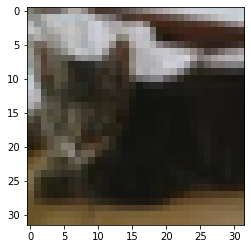

In [18]:
sample = 9

plt.imshow(train_x[sample]);

print('The sample', sample, 'corresponds to a', dic[int(np.argmax(train_y[sample]))])
print("Its one-hot representation is =", train_y[sample])

<font size=4 color="black">
    
In summary, the training and test sample sets have the following dimensions:

In [19]:
print ("number of training examples = " + str(train_x.shape[0]))
print ("number of test examples = " + str(test_x.shape[0]))
print ("X_train shape: " + str(train_x.shape))
print ("Y_train shape: " + str(train_y.shape))
print ("X_test shape: " + str(test_x.shape))
print ("Y_test shape: " + str(test_y.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


<font size=5 color="blue">

Building the Learning System

<font size=5 color='blue'>

Definition of the neural network architecture

<font size=5 color='black'> 
    
Keras has two different modes to define the architecture:

<font size=4 color='black'> 
    
1.- The sequential model. It is a sequential stack of layers.
    
2.- The functional API. It is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.  

In the present case, we will use the latter mode to build the network architecture.
    
Documentation: [Keras Functional API](https://keras.io/getting-started/functional-api-guide/)

In [20]:
def architecture(input_shape, num_classes, dropout=False):
    
    # Defining the input as a tensor with shape input_shape. 
    InputLayer = Input(input_shape)
    
    # Flattening the input tensor of dimensions (32, 32, 3) to a tensor of dimensions (3072)
    x = Flatten()(InputLayer)
    if dropout == True:
        x = Dropout(0.0)(x)
    
    # Defining the first hidden layer with 50 nodes and sigmoid as activation function
    x = Dense(50, kernel_initializer='random_uniform', bias_initializer='zeros', name='hl_1')(x)
    x = Activation('sigmoid')(x)
    if dropout == True:
        x = Dropout(0.0)(x)

    # Defining the second hidden layer with 50 nodes and sigmoid as activation function
    x = Dense(50, kernel_initializer='random_uniform', bias_initializer='zeros', name='hl_2')(x)
    x = Activation('sigmoid')(x)
    if dropout == True:
        x = Dropout(0.0)(x)
    
    
    # For the output layer we use the activation function 'softmax')
    x = Dense(num_classes, kernel_initializer='random_uniform', bias_initializer='zeros')(x)
    OutputLayer = Activation('softmax', name='output-layer')(x)
    
    # This creates the Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = InputLayer, outputs = OutputLayer, name='Cifar10Model')

    return model

<font size=4 color='black'>    
The softmax activation function is always used for classification when the number (K) of classes is greater than two: 

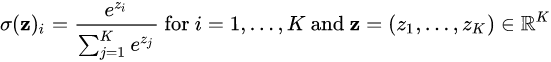    

<font size=5 color="blue">

Building the neural network model for the learning system

In [21]:
one_image = (32, 32, 3)
num_classes=10
dropout=True

cifar10_model = architecture(one_image,num_classes,dropout)

<font size=5 color="blue">
    
Graph of the model and summary

<font size=4 color='black'> 
The 'plot_model()' function generates a graphic with the layers and their number of input ands output weights.
$$ $$
Documentation: [Model visualization](https://keras.io/visualization/#training-history-visualization)

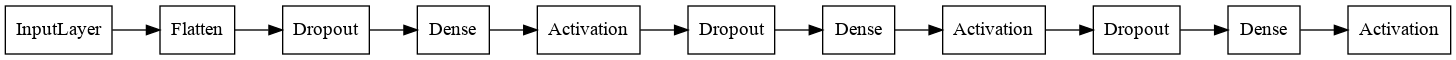

In [22]:
plot_model(cifar10_model, to_file='cifar10_blocks.png', show_shapes=False, rankdir='LR',show_layer_names=False)

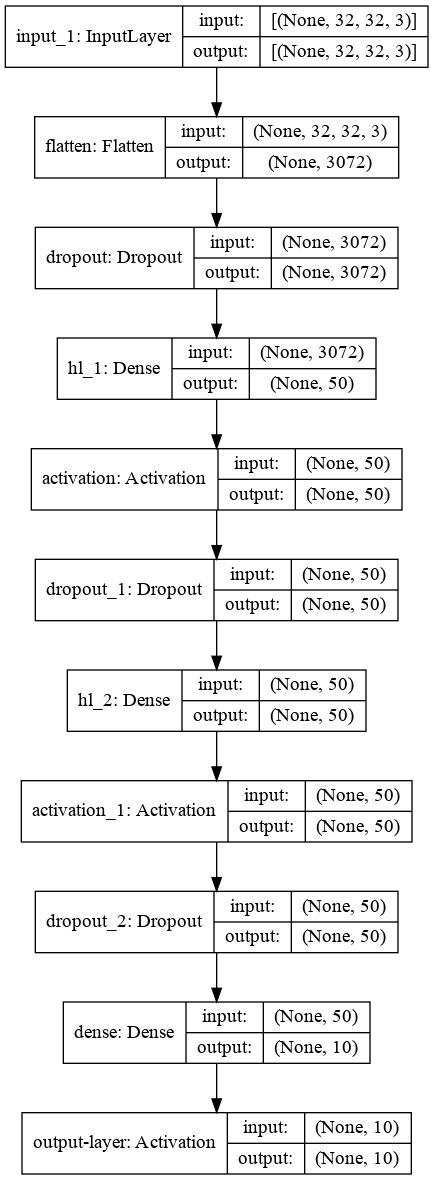

In [23]:
plot_model(cifar10_model, to_file='cifar10_model.png', show_shapes=True, rankdir='TB', show_layer_names=True)

In [24]:

cifar10_model.summary()

Model: "Cifar10Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
hl_1 (Dense)                 (None, 50)                153650    
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
hl_2 (Dense)                 (None, 50)               

<font size=5 color='blue'>
Optimization method

<font size=3 color="black">
This requires defining the optimization algorithm, loss function and metric.
    
In the present case we are using the Stochastic Gradient descent algorithm with learning rate "lr", "momentum",  and without Nesterov acceleration".


[An overview of gradient descent optimization algorithms](./literature/SGD_overview_2016-17.pdf)

This post also comments on some other optimization variants of this algorithm; Adagrad, Adadelta, RMStrop and Adam.

<font size=5 color='blue'>
Optimizer

<font size=5 color='blue'>
Mini-batch stocastic gradient descent(SGD) method.  

<font size=4 color='black'> 
The training samples are divided into mini-batches that have the size batch_size (B). Updates of weights and biases are based on an average of the gradient within each block of B samples. 
    
$$ \omega^{(t)} := \omega^{(t-1)} - \alpha \dfrac{1}{B} \sum_{t^1=Bt +1}^{B(t+1)}\dfrac{\partial J(x^{(t^1)},y^{(t^1)},\omega, b)}{\partial \omega}$$

$$ b^{(t)} := b^{(t-1)} - \alpha \dfrac{1}{B} \sum_{t^1=Bt +1}^{B(t+1)}\dfrac{\partial J(x^{(t^1)},y^{(t^1)},\omega, b)}{\partial b}$$

$ \alpha $ represents the learning rate and *t* represents an iteration. 
    
This method is specially useful for large sets of training data.
    
[Gradient-Based Training](./literature/Practical_rec_DL_Bengio_2012.pdf)

In [25]:
learning_rate = 0.01

optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0, nesterov=False)

<font size=5 color='blue'>
The cost (loss) and Metric functions

<font size=4 color="black">
    
The cost function *J* is defined as "categorical_crossentropy"
    
$$ J = \frac{1}{m} \sum_{i=1}^m \sum_{k=0}^{K-1}(y_k^{(i)}*\log{(F_k(x^{(i)})))}$$
    
 where $F_k(x^{(i)})$ is the predicted value and $y_k^{(i)}$ is the target value for the sample *i*; *K* is the number of classes and *m* is the number of samples.
    
[Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy)
    
[Categorical cross entropy](https://www.deeplearningbook.org/)
    

A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. You may use any of the loss functions as a metric function. In the present example, we are using "accuracy" as metrics:
    
*Accuracy = Number of correct predictions / Total number of predictions made*
    

Categorical crossentropy will compare the distribution of the predictions (the activations in the output layer, one for each class) with the true distribution, where the probability of the true class is set to 1, and 0 for the other classes.

To put it in a different way, the true class is represented as an encoded vector, and the closer the model’s outputs are to that vector, the lower the loss.
    
Documentation: [keras.compile(...)](https://keras.io/models/model/#compile)

In [26]:
loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

<font size=5 color='blue'>
Compiling the model

In [27]:
cifar10_model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

<font size=5 color='blue'>
    
Training the learning system

<font size=5 color='blue'>
    
Shuffle

<font size=4 color='black'>

Shuffling the training data before each epoch has a large effect on the loss associated with the test samples. Shuffling the training data, the samples for each mini-batch change with the epoch.
    
To speed up the convergence of weights and biases, it is also possible to fix the samples associated with each mini-batch. Then, the mini-batches will be called randomly in each epoch.  
    
[An overview of gradient descent optimization algorithms](./literature/SGD_overview_2016-17.pdf)

<font size=4 color="black">
    
Documentation: [keras.fit(...)](https://keras.io/models/model/#fit)

In [28]:
#10 % of the training data will be used to validate the training
validation_portion = 0.1
num_epochs = 100

history = cifar10_model.fit(x = train_x, y = train_y, epochs = num_epochs, batch_size = 32, \
                            validation_split = validation_portion, shuffle=True, verbose=1)

Epoch 1/100
1407/1407 [==============================] - 2s 1ms/step - loss: 2.3040 - accuracy: 0.1009 - val_loss: 2.3037 - val_accuracy: 0.0968
Epoch 2/100
1407/1407 [==============================] - 2s 1ms/step - loss: 2.3035 - accuracy: 0.0981 - val_loss: 2.3036 - val_accuracy: 0.0950
Epoch 3/100
1407/1407 [==============================] - 2s 1ms/step - loss: 2.3031 - accuracy: 0.1053 - val_loss: 2.3020 - val_accuracy: 0.1064
Epoch 4/100
1407/1407 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1035 - val_loss: 2.3014 - val_accuracy: 0.1038
Epoch 5/100
1407/1407 [==============================] - 2s 1ms/step - loss: 2.3024 - accuracy: 0.1042 - val_loss: 2.3024 - val_accuracy: 0.0958
Epoch 6/100
1407/1407 [==============================] - 2s 1ms/step - loss: 2.3012 - accuracy: 0.1090 - val_loss: 2.2990 - val_accuracy: 0.1058
Epoch 7/100
1407/1407 [==============================] - 2s 1ms/step - loss: 2.2990 - accuracy: 0.1126 - val_loss: 2.2946 - val_ac

1407/1407 [==============================] - 2s 1ms/step - loss: 1.6824 - accuracy: 0.3882 - val_loss: 1.7214 - val_accuracy: 0.3784
Epoch 58/100
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6674 - accuracy: 0.3955 - val_loss: 1.7123 - val_accuracy: 0.3792
Epoch 59/100
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6739 - accuracy: 0.3949 - val_loss: 1.6982 - val_accuracy: 0.3866
Epoch 60/100
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6583 - accuracy: 0.4033 - val_loss: 1.7008 - val_accuracy: 0.3852
Epoch 61/100
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6482 - accuracy: 0.4021 - val_loss: 1.6900 - val_accuracy: 0.3880
Epoch 62/100
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6415 - accuracy: 0.4064 - val_loss: 1.6744 - val_accuracy: 0.4018
Epoch 63/100
1407/1407 [==============================] - 2s 1ms/step - loss: 1.6421 - accuracy: 0.4059 - val_loss: 1.6883 - val_accuracy

<font size=5 color="blue">
Graph of cost functions as a function of epoch

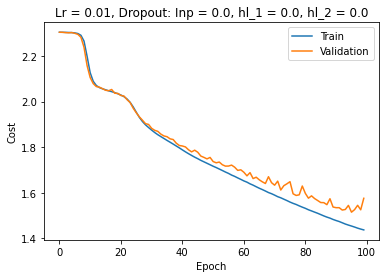

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Lr = 0.01, Dropout: Inp = 0.0, hl_1 = 0.0, hl_2 = 0.0')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<font size=5 color="blue">
Graph of accuracy functions as a function of epoch

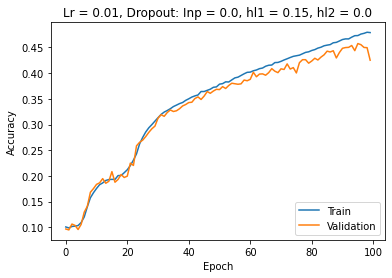

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Lr = 0.01, Dropout: Inp = 0.0, hl1 = 0.15, hl2 = 0.0')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

<font size = 5 color='blue'>
Loss and accuracy evaluation

<font size= 4 color='black'>    
After training the network, the loss and accuracy functions are evaluated using the test samples (test_x, test_y).    

    
[Method evaluate in Keras](https://keras.io/models/model/)

In [31]:
evaluations = cifar10_model.evaluate(x = test_x, y = test_y)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


313/313 [==============================] - 0s 833us/step - loss: 1.5715 - accuracy: 0.4369
Loss = 1.571547031402588
Test Accuracy = 0.43689998984336853


In [32]:
# Evaluation using the first 100 samples of the test set

evaluations = cifar10_model.evaluate(x = test_x[:100], y = test_y[:100])

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


4/4 [==============================] - 0s 1ms/step - loss: 1.4427 - accuracy: 0.4900
Loss = 1.4427142143249512
Test Accuracy = 0.49000000953674316


<font size = 5 color='blue'>
Image prediction

<font size= 4 color='black'>    
The trained learning system can predict the object content of an image. For example, we take an image of the test dataset (test_x, test_y). 
    
[Method predict in Keras](https://keras.io/models/model/)

In [33]:
# Predicting the image associated to the each sample in the test set (X_test)
predictions = cifar10_model.predict(test_x)

In [34]:
sample = 31

<font size=4 color="black"> 
Displaying the image associated (not predicted!) to this sample.

the sample 31 corresponds to a dog


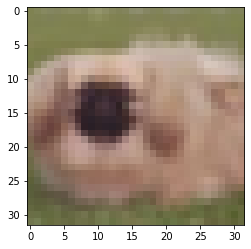

In [35]:

plt.imshow(test_x[sample].reshape((32, 32, 3)))

print('the sample', sample, 'corresponds to a', dic[int(np.argmax(test_y[sample]))])


In [36]:
# Predicting the image associated to the sample 
# np.argmax returns the index of the maximum value

prediction = np.argmax(predictions[sample])

print('For the sample number', sample, 'the prediction is a(n)', dic[prediction])

For the sample number 31 the prediction is a(n) deer


<font size = 4 color="black">
    
The next function finds the number of samples where the network made an incorrect prediction in a region of the test dataset. For example, in the first 40 samples from this dataset.

In [37]:

mislabeled_images = []

for i in range(len(test_x[:40])):
    
    if np.argmax(cifar10_model.predict(test_x)[i]) != np.argmax(test_y[i]):
        
        mislabeled_images.append(i)
 


mislabeled_images

[1, 4, 6, 8, 12, 14, 21, 22, 24, 25, 26, 27, 31, 33, 35, 37]

<font size=4 color='black'>
Keras has the several options to use regularizers L1, L2 or both simultaneously. 
It also has the option of creating custom regulirizers.
    
[Keras layer weight regularizers](https://keras.io/api/layers/regularizers/)

<font size=4 color='black'>
    
[Runs summary](clase9-figures.odt)